# Exercício 4 - SME0130 - Redes Complexas

### Aluno: Luciano Augusto Campagnoli da Silva
### Número USP: 9313367

Importar bibliotecas.

In [87]:
from numpy  import *
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain

np.random.seed(100)

Ler grafos.

##### Jazz

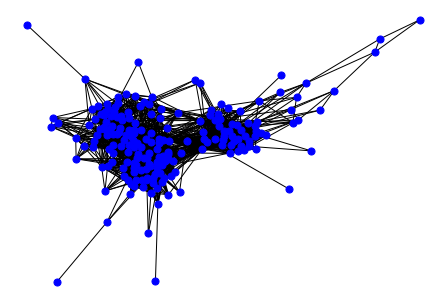

In [372]:
G= nx.read_edgelist("data/data/jazz.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G= G=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

## Questão 1

Detecção de comunidades segundo método *fast-greedy*.

In [163]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
for k in range(0,len(communities)):
    print('Community',k,':', sorted(communities[k]))

Community 0 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community 1 : [24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]
Community 2 : [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community 3 : [186, 187, 188]


Cálculo de modularidade

In [164]:
def same_comunity(v1, v2, communities):
    C = [sorted(community) for community in communities]
    
    v1_com = -1
    v2_com = -1
    # Iterates over all communities
    for i in range(len(C)):
        
        # If already encountered both nodes communities, gets out of
        # loop
        if (v1_com != -1 and v2_com != -1):
            break
            
        if (v1 in C[i]):
            v1_com = i
            
        if (v2 in C[i]):
            v2_com = i
    
    # After passing through all 
    return v1_com == v2_com
     

In [165]:
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(same_comunity(i, j, c)):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

In [172]:
print("Modularity Q = ", modularity(G,communities))

Modularity Q =  0.4389078153753761


Alternativa correta: **c**.

## Questão 2

Detecção de comunidades segundo método de Louvain.

In [373]:
# Louvian method
from community import community_louvain
partitions =community_louvain.best_partition(G)


In [374]:
communities_number = max(list(partitions.values())) + 1
communities_number

communities_matrix = []

for i in range(communities_number):
    community = []
    
    for item in partitions.items():
        if(item[1] == i):
            community.append(item[0])
            
    communities_matrix.append(community)
    

for k in range(0,len(communities_matrix)):
    print('Community',k,':', sorted(communities_matrix[k]))
    

Community 0 : [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 100, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community 1 : [7, 15, 24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 97, 98, 99, 102, 103, 104, 105, 107, 108, 109, 110, 111, 113, 114, 116, 118, 137, 139, 143, 156, 161, 162, 190, 192, 197]
Community 2 : [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community 3 : [66, 88, 94, 95, 96, 101, 106, 112, 115, 117, 119, 121, 122, 123, 124, 131, 133, 150, 154, 186, 187, 188, 193]


In [375]:
print("Modularity Q = ", modularity(G,communities_matrix))

Modularity Q =  0.4446760046200235


Alternativa correta: **e**.

## Questões 3 

Cálculo de modularidades utilizando detecções de comunidades *Louvain* e *fast-greedy*.

### Cálculo da modulraidade para mu = 0.05

In [360]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.05

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
partitions =community_louvain.best_partition(G)

In [361]:
communities_number = max(list(partitions.values())) + 1
communities_number

communities_matrix = []

for i in range(communities_number):
    community = []
    
    for item in partitions.items():
        if(item[1] == i):
            community.append(item[0])
            
    communities_matrix.append(community)
    

for k in range(0,len(communities_matrix)):
    print('Community',k,':', sorted(communities_matrix[k]))
    

Community 0 : [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community 1 : [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community 2 : [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
Community 3 : [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]


In [362]:
print("Modularity Louvain Q = ", modularity(G,communities_matrix))

Modularity Louvain Q =  0.643639535397838


### Cálculo para mu = 0.1

In [363]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.1

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
partitions =community_louvain.best_partition(G)

In [364]:
communities_number = max(list(partitions.values())) + 1
communities_number

communities_matrix = []

for i in range(communities_number):
    community = []
    
    for item in partitions.items():
        if(item[1] == i):
            community.append(item[0])
            
    communities_matrix.append(community)
    

for k in range(0,len(communities_matrix)):
    print('Community',k,':', sorted(communities_matrix[k]))
    

Community 0 : [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
Community 1 : [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
Community 2 : [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community 3 : [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]


In [365]:
print("Modularity Louvain Q = ", modularity(G,communities_matrix))

Modularity Louvain Q =  0.5427818606053953


### Cálculo para mu = 0.2

In [366]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.2

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
partitions =community_louvain.best_partition(G)


In [367]:
communities_number = max(list(partitions.values())) + 1
communities_number

communities_matrix = []

for i in range(communities_number):
    community = []
    
    for item in partitions.items():
        if(item[1] == i):
            community.append(item[0])
            
    communities_matrix.append(community)
    

for k in range(0,len(communities_matrix)):
    print('Community',k,':', sorted(communities_matrix[k]))
    

Community 0 : [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community 1 : [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
Community 2 : [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community 3 : [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]


In [368]:
print("Modularity Q = ", modularity(G,communities_matrix))

Modularity Q =  0.44487909975820294


Alternativa correta: **b**.

## Questão 4

Cálculo de modularidade utilizando *fast-greedy*.

### Para mu = 0.05

In [369]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.05

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

# Execução de detecção de comunidades
communities_fast_greedy = list(greedy_modularity_communities(G))
for k in range(0,len(communities_fast_greedy)):
    print('Community',k,':', sorted(communities_fast_greedy[k]))
    
print("Modularity Fast-Greedy Q = ", modularity(G,communities_fast_greedy))

Community 0 : [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
Community 1 : [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
Community 2 : [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community 3 : [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Modularity Fast-Greedy Q =  0.643639535397838


### Para mu = 0.1

In [370]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.1

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

# Execução de detecção de comunidades
communities_fast_greedy = list(greedy_modularity_communities(G))
for k in range(0,len(communities_fast_greedy)):
    print('Community',k,':', sorted(communities_fast_greedy[k]))
    
print("Modularity Fast-Greedy Q = ", modularity(G,communities_fast_greedy))

Community 0 : [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
Community 1 : [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
Community 2 : [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community 3 : [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Modularity Fast-Greedy Q =  0.5427818606053953


### Para mu = 0.2

In [371]:
N = 128
tau1 = 3
tau2 = 1.5
k =16
minc = 32
maxc = 32
mu = 0.2

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

# Execução de detecção de comunidades
communities_fast_greedy = list(greedy_modularity_communities(G))
for k in range(0,len(communities_fast_greedy)):
    print('Community',k,':', sorted(communities_fast_greedy[k]))
    
print("Modularity Fast-Greedy Q = ", modularity(G,communities_fast_greedy))

Community 0 : [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 123, 124]
Community 1 : [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 85, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community 2 : [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community 3 : [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 94, 101, 107, 110, 113, 115, 118]
Modularity Fast-Greedy Q =  0.4349088598177227


Alernativa correta: **e**.